In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


# Fig. 4c : Count peaks 

In [2]:
import q_stat

In [3]:
with open('./q.pickle','rb') as f:
    q=pickle.load(f)

In [19]:
def plot_count_pts(q,ax=None,s=5):
    """Count points within half Brillouin zone

    Parameters
    ----------
    q : q_stat class
        Class saving all information about the points (q-vector) and intensity
    ax : matplotlib.Axes, optional
        Which `ax` to plot, by default None
    s : int, optional
        size of scattering points, by default 5
    """
    centroid=q._centroid()
    if ax is None:
        fig,ax=plt.subplots(figsize=(4,4))
    
    data_linear=10**q.logdata
    vmin,vmax=np.min(data_linear),np.max(data_linear)
    im=ax.pcolormesh(data_linear,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax),rasterized=True)
    ax.scatter(q.mask_ind[:,1]+0.5,q.mask_ind[:,0]+0.5,s=s,color='r')
    

    line=[]
    for triangle in q.bragg_triangle_list:
        for i in range(3):
            pts1=triangle[i]
            pts2=triangle[(i+1)%3]
            pts=(tuple(pts1.tolist()),tuple(pts2.tolist()))
            line.append(pts)
    
    for pth in set(line):
        ax.plot(np.array(pth)[:,1]+0.5,np.array(pth)[:,0]+0.5,color='blue',lw=2,ls='dotted')
    inside_num,contains_pts=q_stat._is_inside(q.bragg_triangle_list,q.mask_ind,repel=1.4)
    for idx, cor in zip(inside_num, centroid):
        ax.text(cor[1],cor[0],'{:.0f}'.format(idx),color='cyan',fontsize=8) 
    ax.set_xticks([])
    ax.set_yticks([])


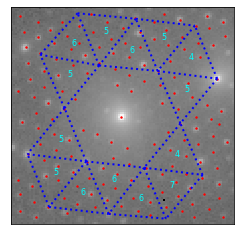

In [26]:
fig,ax=plt.subplots(figsize=(4,4))
plot_count_pts(q,s=2,ax=ax)

# Fig. 4d: Phase diagram

In [ ]:
def plot_phasediagram(model,ax=None):
    if ax is None:
        ig,ax= plt.subplots()
    labels_=model.labels_['mean']
    cmap = plt.get_cmap('plasma', model.k)
    bounds = np.arange(model.k+1)-0.5
    norm = colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(model.labels_grid['mean'],cmap=cmap,norm=norm,extent=(model.rs['y'][0],model.rs['y'][-1],model.rs['x'][-1],model.rs['x'][0]),rasterized=True)
    ax.set_xticks([])
    ax.set_yticks([])

In [22]:
from GMM import GMM_model, scoring

In [23]:
with open('./count_pts_outlier_auto.pickle','rb') as f:
    count_pts_outlier_auto=pickle.load(f)

In [24]:
def plot_phasediagram(model,ax=None):
    if ax is None:
        ig,ax= plt.subplots()
    labels_=model.labels_['mean']
    cmap = plt.get_cmap('plasma', model.k)
    bounds = np.arange(model.k+1)-0.5
    norm = colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(model.labels_grid['mean'],cmap=cmap,norm=norm,extent=(model.rs['y'][0],model.rs['y'][-1],model.rs['x'][-1],model.rs['x'][0]),rasterized=True)
    ax.set_xticks([])
    ax.set_yticks([])

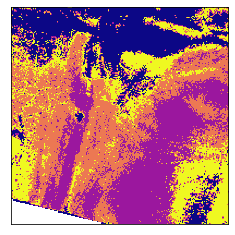

In [27]:
fig,ax=plt.subplots(figsize=(4,4))
plot_phasediagram(count_pts_outlier_auto,ax=ax)

# Fig. 4e : trend

In [34]:
def plot_trend(model,ax=None,method='std',**kwargs):
    if ax is None:
        ig,ax= plt.subplots()
    cmap = plt.get_cmap('plasma', model.k)
    color_list=[cmap(idx) for idx in range(model.k)]
    labels_=model.labels_['mean']
    for n,color in zip(range(model.k),color_list):
        mean=model.X_orig['mean'][labels_==n].T.mean(axis=-1)
        ax.plot(model.rs['T'][model.mask_T],mean,color=color,label=str(n),**kwargs)
        if method == 'std':
            error=model.X_orig['mean'][labels_==n].T.std(axis=-1)
            lb=mean-error
            ub=mean+error
        elif method== 'percentile':
            lb=np.percentile(model.X_orig['mean'][labels_==n],25,axis=0)
            ub=np.percentile(model.X_orig['mean'][labels_==n],75,axis=0)
        else:
            raise ValueError(f'method {method} not defined')
        ax.fill_between(model.rs['T'][model.mask_T],lb,ub,color=color,alpha=0.5)
    ax.set_xticks(range(130,230,30))
    ax.set_yticks([3,4,5,6])
    ax.set_ylabel('Peak number')
    ax.set_xlim(count_pts_outlier_auto.rs['T'][0],count_pts_outlier_auto.rs['T'][-1])

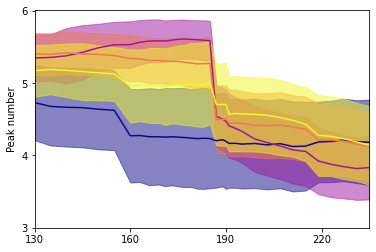

In [35]:
plot_trend(count_pts_outlier_auto,method='std')

# Fig. 4f: CDW angle

In [36]:
angle=[np.load(f'cluster_{idx}_phi.npy') for idx in range(4)]
angle_err=[np.load(f'cluster_{idx}_phi_error.npy') for idx in range(4)]

In [45]:
def plot_CDW_angle(angle,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    cmap = plt.get_cmap('plasma', 4)
    color_list = [cmap(idx) for idx in range(4)]
    T=count_pts_outlier_auto.rs['T']

    for i in range(4):
        ax.plot(T, np.abs(angle[i]), label=f'Cluster {i}', color=color_list[i])
        ax.fill_between(T, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                        color=color_list[i], alpha=0.5)

    ax.set_xlabel("$T$ (K)")
    ax.set_ylabel(r"$\theta^{\circ}$",labelpad=-3)
    # ax.legend()
    ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
    ax.set_yticks(np.arange(13.9,12.1,-0.5))
    ax.set_xticks(range(130,230,30))
    ax.set_xlim(T[0],T[-1])

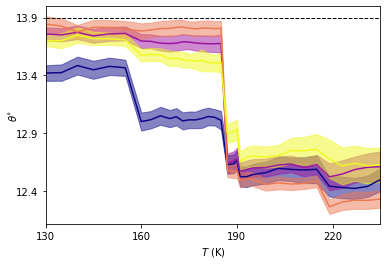

In [46]:
plot_CDW_angle(angle)

# Fig. 4b: bright field image

In [47]:
with open('BF_image.pickle','rb') as f:
    data_mean=pickle.load(f)

In [50]:
def plot_BF(data,ax=None):
    if ax is None:
        fig,ax= plt.subplots()
    
        
    vmin,vmax=data.min(),data.max()
    im=ax.imshow(data,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax),rasterized=True)

    ax.set_xticks([])
    ax.set_yticks([])
    


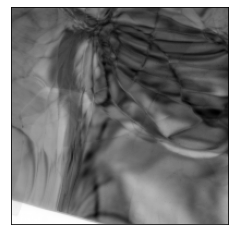

In [51]:
plot_BF(data_mean,)

# Appendix

## Load hypertuning models

In [7]:
with open('elbow_model_count_pts_outlier_sample_2.pickle','rb') as f:
    count_pts_outlier_sample_2=pickle.load(f)


## Elbow method

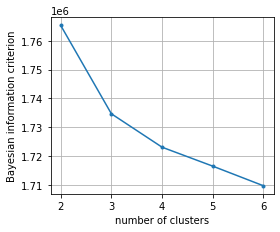

In [17]:
fig,ax=plt.subplots(figsize=(4,4/1.2),tight_layout=True)

ax.plot(count_pts_outlier_sample_2.k_range,count_pts_outlier_sample_2.search['mean'].cv_results_['mean_test_bic'],'.-')

ax.grid('on')
ax.set_xticks(count_pts_outlier_sample_2.k_range)
ax.set_xlabel('number of clusters')
ax.set_ylabel('Bayesian information criterion')
fig.savefig('Elbow method.pdf')